In [1]:
import cv2
import math as m
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose class.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Function to calculate distance between two points
def findDistance(x1, y1, x2, y2):
    return m.sqrt((x2-x1)**2 + (y2-y1)**2)

# Function to calculate angle using the law of cosines
def findAngle(x1, y1, x2, y2):
    theta = m.acos((y2 -y1)*(-y1) / (m.sqrt((x2 - x1)**2 + (y2 - y1)**2) * y1))
    angle = int(180/m.pi)*theta
    return angle

# Load an image
image_path = 'D:/image_dataset/bad_posture/61.png'  # Update this to the path of your image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found.")
else:
    h, w = image.shape[:2]

    # Process the image through MediaPipe Pose
    with pose as p:
        results = p.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    

    lm = results.pose_landmarks
    lmPose = mp_pose.PoseLandmark
        
    if results.pose_landmarks:
        # Draw pose landmarks on the image
        annotated_image = image.copy()
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Extract necessary landmarks for angle calculations
        landmarks = results.pose_landmarks.landmark
        lmPose = mp_pose.PoseLandmark
        
        l_shldr_x = int(lm.landmark[lmPose.LEFT_SHOULDER].x * w)
        l_shldr_y = int(lm.landmark[lmPose.LEFT_SHOULDER].y * h)
        # Right shoulder
        r_shldr_x = int(lm.landmark[lmPose.RIGHT_SHOULDER].x * w)
        r_shldr_y = int(lm.landmark[lmPose.RIGHT_SHOULDER].y * h)
        # Left ear.
        l_ear_x = int(lm.landmark[lmPose.LEFT_EAR].x * w)
        l_ear_y = int(lm.landmark[lmPose.LEFT_EAR].y * h)

        #Right ear
        r_ear_x = int(lm.landmark[lmPose.RIGHT_EAR].x * w)
        r_ear_y = int(lm.landmark[lmPose.RIGHT_EAR].y * h)


        # Left hip.
        l_nose_x = int(lm.landmark[lmPose.NOSE].x * w)
        l_nose_y = int(lm.landmark[lmPose.NOSE].y * h)
        
        # Perform the necessary angle calculations
        neck_inclination = findAngle(l_shldr_x, l_shldr_y, l_ear_x, l_ear_y)
        torso_inclination = findAngle(l_nose_x, l_nose_y, l_shldr_x, l_shldr_y)


        # Assess posture based on the angles
        if 22 <= neck_inclination <= 34 and 120 <= torso_inclination <= 145:
            posture_assessment = "Good posture"
        else:
            posture_assessment = "Bad posture"
            
        # Display the results
        print(f"Neck Inclination: {neck_inclination}")
        print(f"Torso Inclination: {torso_inclination}")
        print(posture_assessment)
        
        # Display the image with landmarks
        cv2.imshow('Posture Analysis', annotated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()



Error: Image not found.


In [2]:
import cv2
import math as m
import mediapipe as mp
import numpy as np
import glob
import os

# Initialize MediaPipe Pose class.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def findDistance(x1, y1, x2, y2):
    return m.sqrt((x2-x1)**2 + (y2-y1)**2)

def findAngle(x1, y1, x2, y2):
    theta = m.acos((y2 -y1)*(-y1) / (m.sqrt((x2 - x1)**2 + (y2 - y1)**2) * y1))
    angle = int(180/m.pi)*theta
    return angle

def evaluate_posture(image_path):
    image = cv2.imread(image_path)

    
    h, w = image.shape[:2]
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if not results.pose_landmarks:
        return 'Posture not detected'
        
    # Draw pose landmarks on the image for visualization
    annotated_image = image.copy()
    mp.solutions.drawing_utils.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Correctly accessing landmarks
    landmarks = results.pose_landmarks.landmark
    
    l_shldr_x = int(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x * w)
    l_shldr_y = int(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y * h)
    r_shldr_x = int(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x * w)
    r_shldr_y = int(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y * h)
    l_ear_x = int(landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x * w)
    l_ear_y = int(landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y * h)
    r_ear_x = int(landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x * w)
    r_ear_y = int(landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y * h)
    l_nose_x = int(landmarks[mp_pose.PoseLandmark.NOSE.value].x * w)
    l_nose_y = int(landmarks[mp_pose.PoseLandmark.NOSE.value].y * h)
    
    # Perform the necessary angle calculations
    neck_inclination = findAngle(l_shldr_x, l_shldr_y, l_ear_x, l_ear_y)
    torso_inclination = findAngle(l_nose_x, l_nose_y, l_shldr_x, l_shldr_y)
    
    # Assess posture based on the angles
    if 22 <= neck_inclination <= 34 and 120 <= torso_inclination <= 145:
        posture_assessment = "Good posture"
    else:
        posture_assessment = "Bad posture"
        
    return posture_assessment




In [11]:
# Directories for posture images
good_posture_dir = 'D:/image_dataset/good_posture'
bad_posture_dir = 'D:/image_dataset/bad_posture'

def process_directory(directory):
    for extension in ['*.png', '*.jpg']:
        for image_path in glob.glob(os.path.join(directory, extension)):
            assessment = evaluate_posture(image_path)
            print(f"{os.path.basename(image_path)}: {assessment}")

print("Evaluating Good Posture Images:")
process_directory(good_posture_dir)

print("\nEvaluating Bad Posture Images:")
process_directory(bad_posture_dir)

Evaluating Good Posture Images:
14.png: Good posture
15.png: Good posture
16.png: Good posture
17.png: Good posture
18.png: Good posture
19.png: Good posture
1B.png: Bad posture
2.png: Good posture
20.png: Good posture
21.png: Good posture
22.png: Good posture
23.png: Good posture
24B.png: Bad posture
25B.png: Bad posture
26B.png: Bad posture
27.png: Good posture
28.png: Good posture
29.png: Good posture
3.png: Good posture
30.png: Good posture
31B.png: Bad posture
32B.png: Bad posture
33.png: Good posture
34.png: Good posture
35.png: Good posture
36.png: Good posture
37B.png: Bad posture
38B.png: Bad posture
39B.png: Bad posture
4.png: Good posture
40.png: Good posture
41.png: Good posture
42.png: Good posture
43B.png: Bad posture
44.png: Good posture
45.png: Good posture
46.png: Good posture
49B.png: Bad posture
50.png: Good posture
51.png: Good posture
52.png: Good posture
53.png: Good posture
54.png: Good posture
55B.png: Bad posture
56B.png: Bad posture
57.png: Good posture
58B.pn

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder



def process_directory(directory, label):
    filenames = []
    predictions = []
    true_labels = []
    for extension in ['*.png', '*.jpg']:
        for image_path in glob.glob(os.path.join(directory, extension)):
            assessment = evaluate_posture(image_path)
            predictions.append(assessment)
            filenames.append(os.path.basename(image_path))
            true_labels.append(label)  # Label is inferred from the directory name
    return filenames, predictions, true_labels

# Assuming binary labels, encode them
label_encoder = LabelEncoder()
label_encoder.fit(['Good posture', 'Bad posture'])

# Process images and get predictions along with true labels
filenames_good, predictions_good, true_labels_good = process_directory('D:\\image_dataset\\good_posture', 'Good posture')
filenames_bad, predictions_bad, true_labels_bad = process_directory('D:\\image_dataset\\bad_posture', 'Bad posture')

# Combine all filenames, predictions, and true labels
all_filenames = filenames_good + filenames_bad
all_predictions = predictions_good + predictions_bad
all_true_labels = true_labels_good + true_labels_bad

# Encode labels for computation
true_labels_encoded = label_encoder.transform(all_true_labels)
predictions_encoded = label_encoder.transform(all_predictions)

# Compute metrics
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
precision = precision_score(true_labels_encoded, predictions_encoded, average='weighted')
recall = recall_score(true_labels_encoded, predictions_encoded, average='weighted')
f1 = f1_score(true_labels_encoded, predictions_encoded, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7135922330097088
Precision: 0.7172412842012357
Recall: 0.7135922330097088
F1 Score: 0.7145947795449528


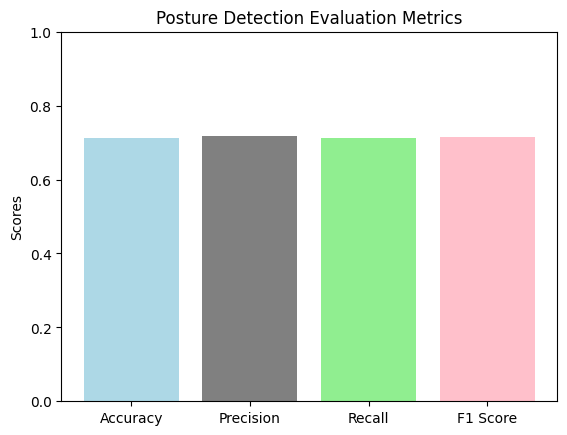

In [22]:
import matplotlib.pyplot as plt

# Metrics calculated previously
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting
fig, ax = plt.subplots()
ax.bar(metrics.keys(), metrics.values(), color=['lightblue', 'grey', 'lightgreen', 'pink'])

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Posture Detection Evaluation Metrics')
ax.set_ylim(0, 1)  # Assuming scores are between 0 and 1

# Show plot
plt.show()


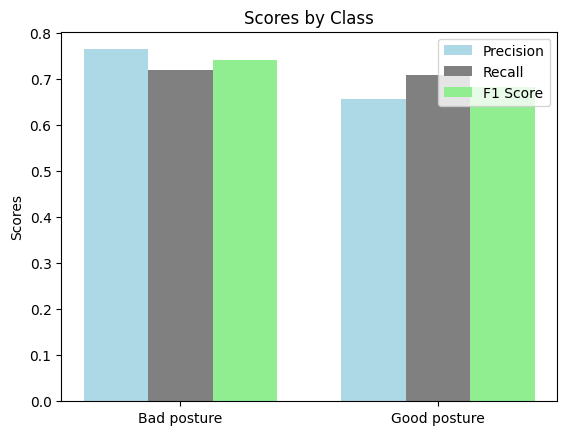

In [24]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

# Assuming true_labels_encoded, predicted_labels_encoded, and label_encoder are defined elsewhere

metrics = precision_recall_fscore_support(true_labels_encoded, predictions_encoded, average=None, labels=np.unique(true_labels_encoded))
precision, recall, f1, _ = metrics

# For plotting
categories = label_encoder.classes_

x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots()
# Adjusting the colors here
rects1 = ax.bar(x - width, precision, width, label='Precision', color='lightblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='grey')
rects3 = ax.bar(x + width, f1, width, label='F1 Score', color='lightgreen')

ax.set_ylabel('Scores')
ax.set_title('Scores by Class')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


In [28]:
from sklearn.metrics import classification_report
print(classification_report(true_labels_encoded, predictions_encoded, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

 Bad posture       0.76      0.72      0.74       117
Good posture       0.66      0.71      0.68        89

    accuracy                           0.71       206
   macro avg       0.71      0.71      0.71       206
weighted avg       0.72      0.71      0.71       206



In [26]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming true_labels_encoded and predicted_labels_encoded are defined elsewhere
# Also assuming label_encoder is already fitted to your classes

metrics = precision_recall_fscore_support(true_labels_encoded, predictions_encoded, average=None, labels=np.unique(true_labels_encoded))
precision, recall, f1, _ = metrics

# Calculate overall accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)

# For printing metrics by class
categories = label_encoder.classes_

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nScores by Class:")
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f" Precision: {precision[i]:.2f}")
    print(f" Recall: {recall[i]:.2f}")
    print(f" F1 Score: {f1[i]:.2f}\n")



Accuracy: 71.36%

Scores by Class:
Class: Bad posture
 Precision: 0.76
 Recall: 0.72
 F1 Score: 0.74

Class: Good posture
 Precision: 0.66
 Recall: 0.71
 F1 Score: 0.68



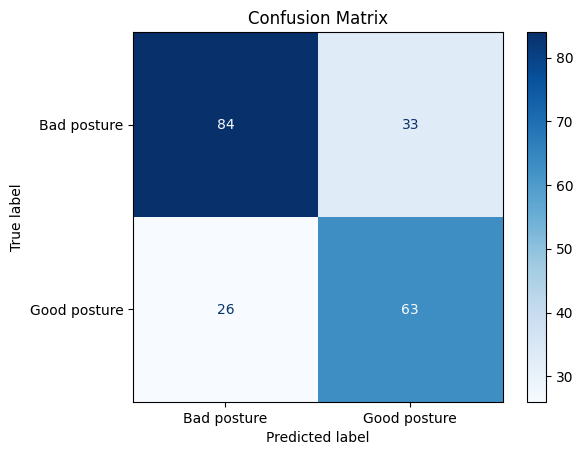

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels_encoded, predictions_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
